In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

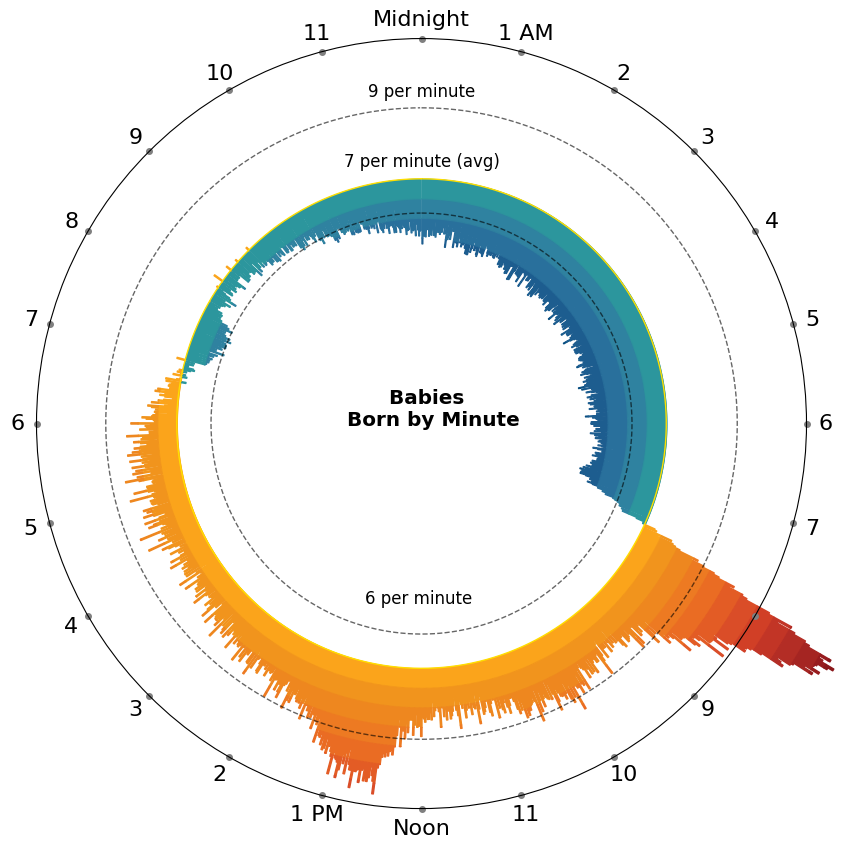

In [2]:
df = pd.read_csv("births.csv")
df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce')
df['total_minutes'] = df['time'].dt.hour * 60 + df['time'].dt.minute

births_per_minute = df.groupby('total_minutes').size() / 365
births_per_minute = births_per_minute.reindex(range(1440), fill_value=births_per_minute.mean())

df_time = pd.DataFrame({'angle': np.linspace(0, 2 * np.pi, 1440, endpoint=False),
                        'normalized_count': births_per_minute})

avg_per_min = births_per_minute.mean()

below_gradient = ['#094E81', '#226192', '#2D7AA2', '#318F9D', '#17B09C']  
above_gradient = ['#FBA41B', '#EF901E', '#EE8320', '#EC7323', '#E66024', '#DB4F28', '#D03D26', '#BE3326', '#AD2A24', '#9B1E1F', '#8D181B', '#7B1515']  
below_cmap = LinearSegmentedColormap.from_list('below_gradient', below_gradient)
above_cmap = LinearSegmentedColormap.from_list('above_grad', above_gradient)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")  
ax.set_theta_direction(-1)

ax.plot(df_time['angle'], [avg_per_min] * len(df_time), color='#FFDE00', linewidth=1, clip_on=False)
ax.plot(df_time['angle'], [avg_per_min * 0.86] * len(df_time), 'k--', lw=1, alpha=0.6, clip_on=False) 
ax.plot(df_time['angle'], [avg_per_min * 1.29] * len(df_time), 'k--', lw=1, alpha=0.6, clip_on=False)

below_bands = [avg_per_min*0.60, avg_per_min*0.68, avg_per_min*0.76, avg_per_min*0.84, avg_per_min*0.92, avg_per_min]
above_bands = [avg_per_min, avg_per_min * 1.08, avg_per_min * 1.16, avg_per_min * 1.24,
               avg_per_min * 1.32, avg_per_min * 1.40, avg_per_min * 1.48, avg_per_min * 1.56,
               avg_per_min * 1.64, avg_per_min * 1.72, avg_per_min * 1.80, avg_per_min * 1.88,
               avg_per_min * 1.92, avg_per_min * 2.00]

for i in range(len(df_time) - 1):
    normalized_value = df_time['normalized_count'][i]
   
    if normalized_value < avg_per_min:
        y_min = df_time['normalized_count'][i]
        y_max = avg_per_min
       
        for j in range(len(below_bands) - 1):
            if y_min < below_bands[j+1]:  
                ax.fill_between(df_time['angle'][i:i+2],
                                max(y_min, below_bands[j]),  
                                min(y_max, below_bands[j+1]),  
                                color=below_cmap(j / (len(below_bands) - 1)))  
    else:
        y_min = avg_per_min
        y_max = df_time['normalized_count'][i]

        for j in range(len(above_bands) - 1):
            if y_max > above_bands[j]:
                ax.fill_between(df_time['angle'][i:i+2],
                                max(y_min, above_bands[j]),
                                min(y_max, above_bands[j+1]),
                                color=above_cmap(j / (len(above_bands) - 1)),
                                clip_on=False)

hour_labels = ["Midnight", "1 AM", "2", "3", "4", "5", "6", "7", "", "9", "10", "11", "Noon", "1 PM", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ax.set_xticklabels(hour_labels, fontsize=16)

for tick in np.linspace(0, 2 * np.pi, 24, endpoint=False):
    ax.plot(tick, 11, 'o', markersize=4, color='gray', clip_on=False)

ax.yaxis.set_tick_params(labelbottom=False)
ax.set_ylim(0, 11)
ax.grid(False)

plt.text(0.5, 0.5, 'Babies \n Born by Minute', horizontalalignment='center', verticalalignment='center', fontsize="x-large", fontweight='bold')
plt.text(0, 7.5, '7 per minute (avg)', horizontalalignment='center', verticalalignment='center', fontsize="large", fontweight='light')
plt.text(0, 9.5, '9 per minute', horizontalalignment='center', verticalalignment='center', fontsize="large", fontweight='light')
fig.text(0.51, 0.32, '6 per minute', horizontalalignment='center', verticalalignment='center', fontsize="large", fontweight='light')

plt.show()